In [161]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...


Ellipsis

In [162]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [163]:
url = "/content/drive/MyDrive/pima diabetes data set/new.csv"

dataset = read_csv(url)

In [164]:
# shape
print(dataset.shape)

(4240, 3)


In [165]:

# head
print(dataset.head(20))

    hypoglycemia  heartRate  glucose
0              0         80       77
1              0         95       76
2              0         75       70
3              0         65      103
4              0         85       85
5              0         77       99
6              0         60       85
7              0         79       78
8              0         76       79
9              0         93       88
10             0         75       76
11             1         72       61
12             1         98       64
13             0         65       84
14             0         85       82
15             0         95       70
16             0         64       72
17             0         80       89
18             0         75       78
19             1         85       65


In [166]:
print(dataset.groupby('hypoglycemia').size())

hypoglycemia
0    3494
1     746
dtype: int64


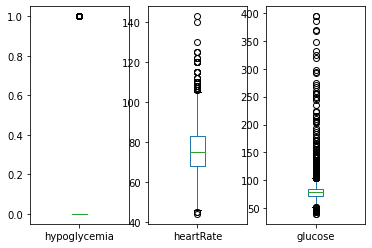

In [177]:
...
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
pyplot.show()

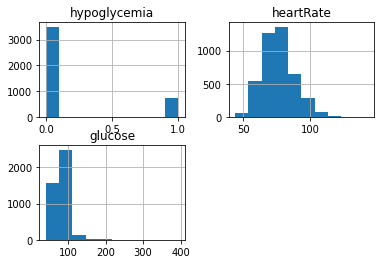

In [168]:
dataset.hist()
pyplot.show()

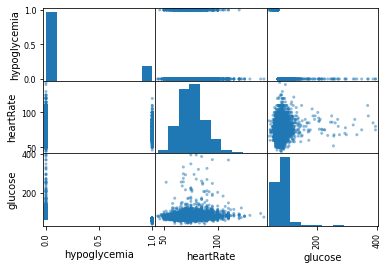

In [169]:
scatter_matrix(dataset)
pyplot.show()

In [170]:
...
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [171]:
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 1.000000 (0.000000)
LDA: 0.825176 (0.001944)
KNN: 0.999411 (0.001178)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.992631 (0.002717)


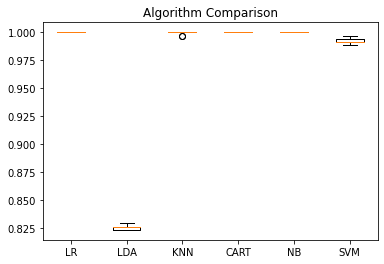

In [172]:

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [173]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [174]:

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9941037735849056
[[701   0]
 [  5 142]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       1.00      0.97      0.98       147

    accuracy                           0.99       848
   macro avg       1.00      0.98      0.99       848
weighted avg       0.99      0.99      0.99       848

